# Изучение рынка заведений общественного питания Москвы

### Цели и задачи проекта

Провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места.

### Описание данных

Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым
- seats — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино».

### Содержимое проекта

1) Загрузка данных и знакомство с ними

2) Предобработка данных

3) Исследовательский анализ данных

4) Итоговый вывод и рекомендации


## 1. Загрузка данных и знакомство с ними

In [7]:
!pip install phik

In [8]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [9]:
# Выгружаем данные в переменные rest_info и rest_price
info_df = pd.read_csv('datasets/rest_info.csv')
price_df = pd.read_csv('datasets/rest_price.csv')

In [10]:
# Выводим первые строки датафрейма `rest_info` на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [11]:
# Выводим информацию о датафрейме `rest_info`
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [12]:
# Выводим первые строки датафрейма `rest_price` на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [13]:
# Выводим информацию о датафрейме `rest_price`
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


### Промежуточный вывод

1) Объём данных:
`rest_info`: 8406 заведений, `rest_price`: 4058 (много пропущенных цен).

2) Пропуски:
`rest_info`: hours (536), seats (3611).

`rest_price`: price (743), avg_bill (242), middle_coffee_cup (87% пропусков).

3) Проблемы:

Текстовые форматы: время работы, средний счёт ("1000–1600 ₽"), категории цен.

`seats` и `middle_coffee_cup` частично заполнены.

4) Действия:

Чистка пропусков, извлечение чисел из текста, преобразование времени работы, проверка связи таблиц по id.

Промежуточный вывод: Данные требуют предобработки, но пригодны для анализа.

### Подготовка единого датафрейма

In [14]:
# Объединение по id с левым соединением
rest_df = pd.merge(info_df, price_df, on='id', how='left')

In [15]:
# Проверка размера
print(f"Размер объединенного датафрейма: {rest_df.shape}")
display(rest_df.head(2))

Размер объединенного датафрейма: (8406, 13)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN


## 2. Предобработка данных

In [16]:
# Проверка типов данных
print("Типы данных до преобразования:")
display(rest_df.dtypes)

Типы данных до преобразования:


id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [17]:
# Преобразуем столбцы с числовыми значениями
rest_df['rating'] = rest_df['rating'].astype(float)
rest_df['chain'] = rest_df['chain'].astype(int)
rest_df['seats'] = rest_df['seats'].astype(pd.Int64Dtype())
rest_df['middle_avg_bill'] = rest_df['middle_avg_bill'].astype(float)

In [18]:
print("Типы данных после преобразования seats:")
display(rest_df.dtypes)

Типы данных после преобразования seats:


id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int32
seats                  Int64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [19]:
# Подсчёт абсолютных и относительных пропусков
missing = rest_df.isna().sum()
missing_percent = (rest_df.isna().mean() * 100).round(2)

# Объединяем в одну таблицу
missing_df = pd.DataFrame({
    'Кол-во пропусков': missing,
    'Доля пропусков': missing_percent
})

# Отображаем только те столбцы, где есть пропуски
missing_df = missing_df[missing_df['Кол-во пропусков'] > 0]
missing_df

,Кол-во пропусков,Доля пропусков
hours,536,6.38
seats,3611,42.96
price,5091,60.56
avg_bill,4590,54.60
middle_avg_bill,5257,62.54
middle_coffee_cup,7871,93.64


In [20]:
# Изучаем примеры строк с пропусками
rest_df[rest_df['avg_bill'].isna()].sample(5)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
4373,f47ee38094574888b98d1a75a05b7a22,La Veranda,ресторан,"Москва, Большой Козловский переулок, 4, стр. 4",Центральный административный округ,"ежедневно, 12:00–00:00",4.6,0,<NA>,NaN,NaN,NaN,NaN
2529,a83416a3da184039b55bbdc5b57ebd3d,Штолле,булочная,"Москва, проспект Мира, 46",Центральный административный округ,"ежедневно, 08:00–21:00",4.0,1,<NA>,NaN,NaN,NaN,NaN
4949,d597f51be8784f4d8f12d28725d9d976,На Ковёр,"бар,паб","Москва, улица Александра Солженицына, 23А, стр. 4",Центральный административный округ,"пн-ср 12:00–00:00; чт,пт 12:00–02:00; сб 10:00...",4.4,0,<NA>,NaN,NaN,NaN,NaN
5478,ecdad946c45340b4a4544c9ec2596167,Кафе,кафе,"Москва, 2-й проезд Перова Поля, 5",Восточный административный округ,NaN,4.0,0,<NA>,NaN,NaN,NaN,NaN
6134,e1826d5c1b5f4fcf9f07a20fe2cb84af,Ресторан-караоке Шу-Шу,ресторан,"Москва, Духовской переулок, 17, стр. 16",Южный административный округ,"пн-чт 11:00–23:00; пт,сб 11:00–05:00; вс 11:00...",4.3,0,45,выше среднего,NaN,NaN,NaN


In [21]:
# Проверка количества посадочных мест
len(temp[temp['seats'] == 0])

NameError: name 'temp' is not defined

In [ ]:
#Создаем копию данных для безопасности
rest_df_clean = rest_df.copy()

# Для seats (количество мест не может быть отрицательным)
rest_df_clean['seats'] = rest_df_clean['seats'].fillna(-1)  # Int64 поддерживает отрицательные числа

# Для middle_avg_bill (средний чек не может быть отрицательным или нулевым)
rest_df_clean['middle_avg_bill'] = rest_df_clean['middle_avg_bill'].fillna(-999).astype('float32')

In [ ]:
# Нормализация названий и адресов
rest_df['name_norm'] = rest_df['name'].str.lower().str.strip()
rest_df['address_norm'] = rest_df['address'].str.lower().str.strip()

In [ ]:
# Поиск полных дубликатов
dups = rest_df.duplicated(subset=['name_norm', 'address_norm'])
rest_df[dups]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,name_norm,address_norm
215,897ddbc6746c4388b19dc8a9fcdbb488,Кафе,кафе,"Москва, парк Ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,<NA>,NaN,NaN,NaN,NaN,кафе,"москва, парк ангарские пруды"
1511,a69f018d5c064873a3b491b0121bc1b4,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN,more poke,"москва, волоколамское шоссе, 11, стр. 2"
2420,aba1de7ad7d64ac0a3f8684bda29d905,Раковарня Клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,"москва, проспект мира, 118"
3109,d3116844e4e048f99614eb30be3214e0,Хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276,NaN,NaN,NaN,NaN,хлеб да выпечка,"москва, ярцевская улица, 19"


In [ ]:
# Удаление дубликатов
rest_df = rest_df[~dups]

In [ ]:
# Метка только для точного шаблона "ежедневно, круглосуточно"
rest_df['is_24_7'] = rest_df['hours'] == 'ежедневно, круглосуточно'

---

### Промежуточный вывод


In [ ]:
# Объём данных до объединения
print(f"rest_info: {len(info_df)} заведений, rest_price: {len(price_df)} записей")

rest_info: 8406 заведений, rest_price: 4058 записей


In [ ]:
# Пропуски в объединённом датафрейме
print(rest_df.isna().sum())

id                      0
name                    0
category                0
address                 0
district                0
hours                 535
rating                  0
chain                   0
seats                3610
price                5087
avg_bill             4586
middle_avg_bill      5253
middle_coffee_cup    7867
name_norm               0
address_norm            0
is_24_7                 0
dtype: int64


Вывод: 

1) Объём данных: `rest_info`: 8406 заведений, `rest_price`: 4058 записей (есть пропуски в ценах).

2) Пропуски: `hours`: 535, `seats`: 3610 `price`: 5087, `avg_bill`: 4586, `middle_coffee_cup`: 7867, `middle_avg_bill`: 5253

3) Действия: заполнили пропуски, преобразовали типы, нормализовали текст, удалили дубликаты, добавили признак 24/7.

## 3. Исследовательский анализ данных

In [ ]:
# Абсолютные и относительные значения категорий
total = len(rest_df)
cat_counts = rest_df['category'].value_counts()
cat_rel = (cat_counts / total * 100).round(2)
pd.DataFrame({'Абсолютно': cat_counts, 'Относительно (%)': cat_rel})

,Абсолютно,Относительно (%)
кафе,2376,28.28
ресторан,2042,24.30
кофейня,1413,16.82
"бар,паб",764,9.09
пиццерия,633,7.53
быстрое питание,603,7.18
столовая,315,3.75
булочная,256,3.05


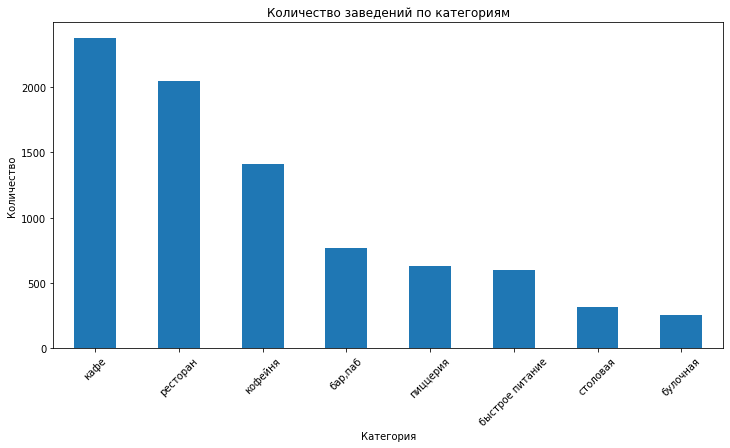

In [ ]:
cat_counts = rest_df['category'].value_counts()
plt.figure(figsize=(12,6))
cat_counts.plot(kind='bar')
plt.title('Количество заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Вывод: наиболее часто встречаются кафе и рестораны.

In [ ]:
# Абсолютные и относительные по районам
dist_counts = rest_df['district'].value_counts()
dist_rel = (dist_counts / total * 100).round(2)
pd.DataFrame({'Абсолютно': dist_counts, 'Относительно (%)': dist_rel})

,Абсолютно,Относительно (%)
Центральный административный округ,2242,26.68
Северный административный округ,898,10.69
Южный административный округ,892,10.62
Северо-Восточный административный округ,890,10.59
Западный административный округ,850,10.12
Восточный административный округ,798,9.50
Юго-Восточный административный округ,714,8.50
Юго-Западный административный округ,709,8.44
Северо-Западный административный округ,409,4.87


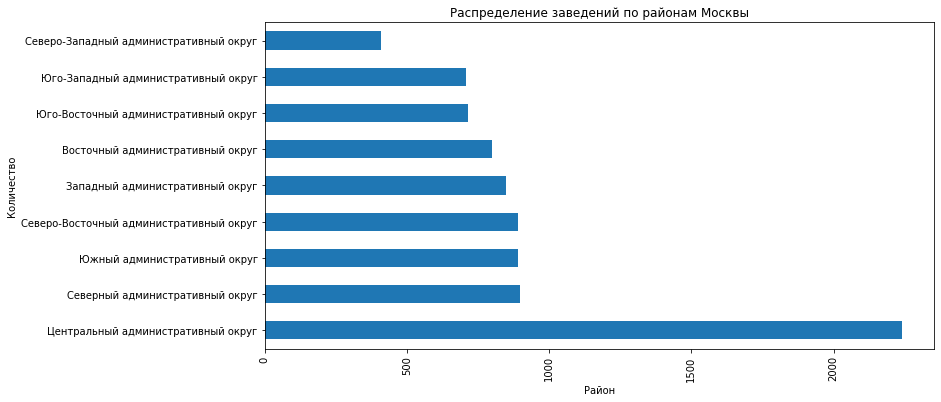

In [ ]:
district_counts = rest_df['district'].value_counts()
plt.figure(figsize=(12,6))
district_counts.plot(kind='barh')
plt.title('Распределение заведений по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

Исходя из полученных данных, можно сделать вывод, что самая большая доля заведений приходится на ЦАО, а именно 26,68%, а в СЗАО всего 4.87%, что является довольно маленьких количеством

In [ ]:
cao = rest_df[rest_df['district']=='Центральный административный округ']
cao_counts = cao['category'].value_counts()
cao_rel = (cao_counts / len(cao) * 100).round(2)
pd.DataFrame({'Абсолютно': cao_counts, 'Относительно (%)': cao_rel})

,Абсолютно,Относительно (%)
ресторан,670,29.88
кафе,464,20.70
кофейня,428,19.09
"бар,паб",364,16.24
пиццерия,113,5.04
быстрое питание,87,3.88
столовая,66,2.94
булочная,50,2.23


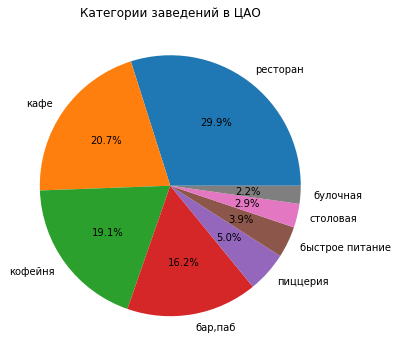

In [ ]:
cao = rest_df[rest_df['district'] == 'Центральный административный округ']
plt.figure(figsize=(6,6))
cao['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Категории заведений в ЦАО')
plt.ylabel('')
plt.show()

Вывод: большинство заведений в ЦАО составляет рестораны, кафе и кофейни - 29,9%, 20,7% и 19,1% соответственно, в то время как булочные и столовые вместе составляют менее 5% заведений

In [ ]:
# Абсолютные и относительные
total_chains = rest_df['chain'].value_counts()
total_chains_rel = (total_chains / total * 100).round(2)
pd.DataFrame({'Абсолютно': total_chains, 'Относительно (%)': total_chains_rel})

,Абсолютно,Относительно (%)
0,5199,61.88
1,3203,38.12


Text(0, 0.5, '')

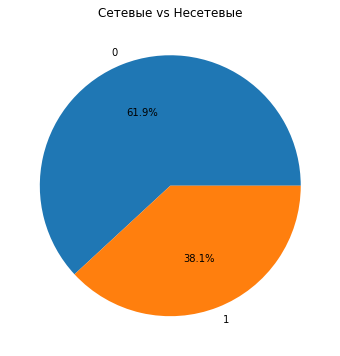

In [ ]:
# Визуализация общего
total_chains_rel.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Сетевые vs Несетевые')
plt.ylabel('')

Вывод: 
Несетевых заведений больше сетевых, что может нам говорить об их популярности. При всём при этом, количество сетевых заведений будет расти, поэтому ставку можно сделать на этом

In [ ]:
# Доля сетевых по категориям
chain_by_cat = rest_df.groupby('category')['chain'].mean().sort_values(ascending=False)
chain_by_cat_rel = (chain_by_cat * 100).round(2)
pd.DataFrame({'Доля сетевых (%)': chain_by_cat_rel})

,Доля сетевых (%)
category,
булочная,61.33
пиццерия,52.13
кофейня,50.96
быстрое питание,38.47
ресторан,35.70
кафе,32.79
столовая,27.94
"бар,паб",21.99


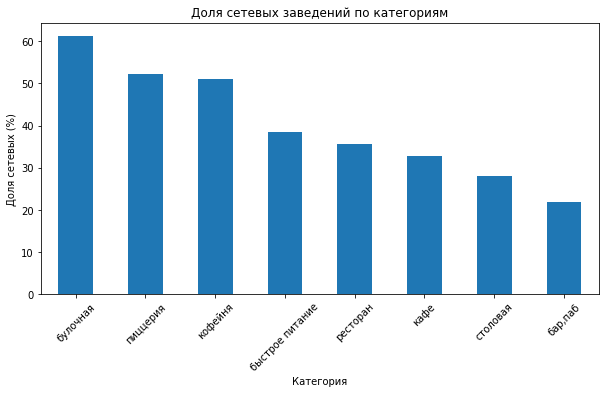

In [ ]:
# Визуализация по категориям
plt.figure(figsize=(10,5))
chain_by_cat_rel.plot(kind='bar')
plt.title('Доля сетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Доля сетевых (%)')
plt.xticks(rotation=45);

Вывод: доля сетевых заведений выше 50% среди булочных, пиццерий и кофейн.

In [ ]:
# Оставляем только ненулевые реальные значения
seats = rest_df['seats'].dropna()
# Сводная статистика
seats.describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Text(0, 0.5, 'Частота')

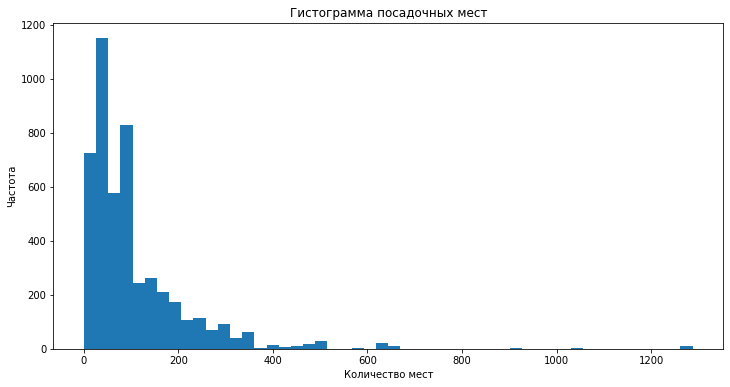

In [ ]:
# Гистограмма и boxplot
plt.figure(figsize=(12,6))
plt.hist(seats, bins=50)
plt.title('Гистограмма посадочных мест')
plt.xlabel('Количество мест'); plt.ylabel('Частота')

Text(0.5, 0, 'Количество мест')

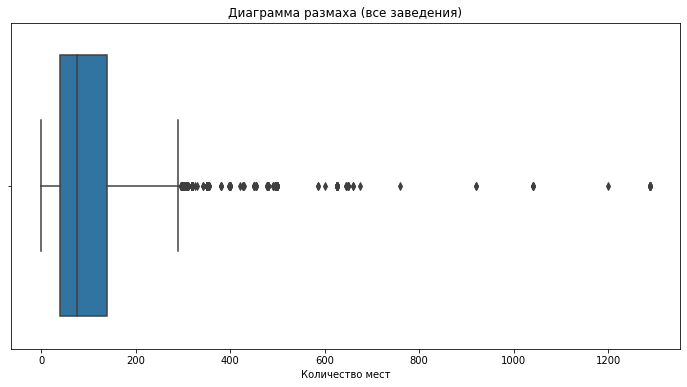

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=seats)
plt.title('Диаграмма размаха (все заведения)')
plt.xlabel('Количество мест')

In [ ]:
# Типичное количество мест по категориям
seats_stats = rest_df.groupby('category')['seats'].agg(['mean','median']).sort_values('median')
seats_stats

,mean,median
category,,
булочная,89.385135,50.0
пиццерия,94.496487,55.0
кафе,97.365653,60.0
быстрое питание,98.891117,65.0
столовая,99.75,75.5
кофейня,111.199734,80.0
"бар,паб",124.477516,82.0
ресторан,121.892041,86.0


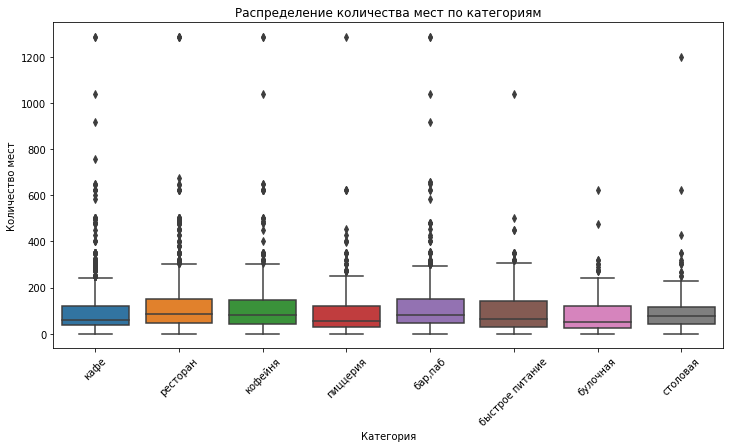

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=rest_df, x='category', y='seats')
plt.title('Распределение количества мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

Вывод: Исходя из полученных данных можно смело сказать, что в среднем посадочных мест в заведениях около 50-90, но также бывают и уникальные случае, когда их количество выходит за 300. Также среднее значение во всех заведениях больше медианы, что явно говорит нам о выбросах, которые можно увидеть на "Распределение количества мест по категориям"

In [ ]:
rest_df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [ ]:
# Средний рейтинг по категориям
rating_by_cat = rest_df.groupby('category')['rating'].mean().sort_values(ascending=False)
rating_by_cat

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

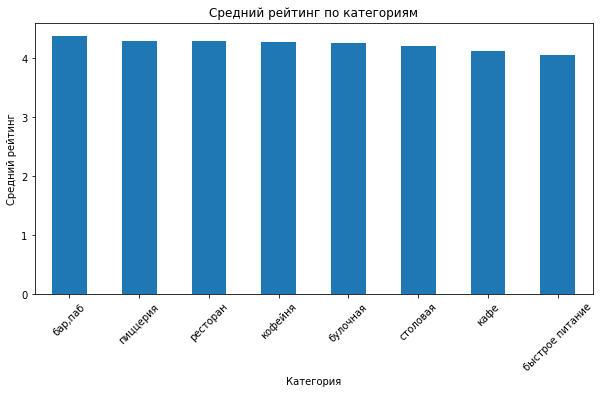

In [ ]:
plt.figure(figsize=(10,5))
rating_by_cat.plot(kind='bar')
plt.title('Средний рейтинг по категориям')
plt.xlabel('Категория'); plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45);

Вывод: Средний рейтинг во всех заведениях примерно одинаковый, что говорит нам о популярности всех заведений, но при этом  явно можно выделить бар.паб у которого рейтинг 4,39, а меньше всего у быстрого питания - 4,05

In [ ]:
# Убрали заглушки
rest_df['seats'].value_counts()[:2]

40     253
100    213
Name: seats, dtype: Int64

In [ ]:
# Подготовка категорий для phik
corr_df = rest_df[['rating','category','district','chain','seats', 'price' ,'is_24_7']].copy()
corr_df['category'] = corr_df['category'].astype('category')
corr_df['district'] = corr_df['district'].astype('category')
corr_df['is_24_7'] = corr_df['is_24_7'].astype(int)

In [ ]:
# Расчет phi_k
phi_k_matrix = phik_matrix(corr_df)
phi_k_matrix

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']


,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.189716,0.200761,0.107833,0.000000,0.220295,0.150365
category,0.189716,1.000000,0.174584,0.266000,0.048923,0.566933,0.244815
district,0.200761,0.174584,1.000000,0.064473,0.352440,0.202787,0.076357
chain,0.107833,0.266000,0.064473,1.000000,0.056523,0.218211,0.043488
seats,0.000000,0.048923,0.352440,0.056523,1.000000,0.088146,0.043193
price,0.220295,0.566933,0.202787,0.218211,0.088146,1.000000,0.084183
is_24_7,0.150365,0.244815,0.076357,0.043488,0.043193,0.084183,1.000000


Text(0.5, 1.0, 'Phi_k корреляции')

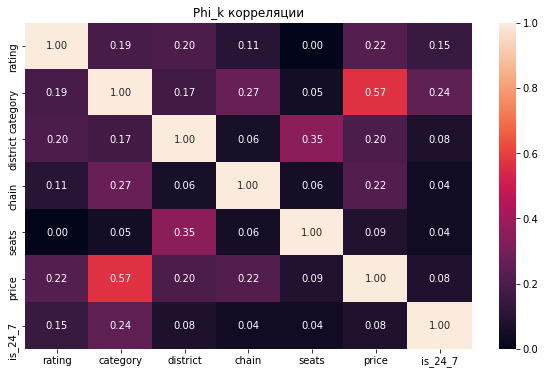

In [ ]:
# Визуализация phi_k матрицы
plt.figure(figsize=(10,6))
sns.heatmap(phi_k_matrix, annot=True, fmt='.2f')
plt.title('Phi_k корреляции')

Вывод: сильнее всего связь между `rating` и `price` - 0,22, что может нам напрямую говорить о том, что от рейтинга заведения сильно зависит и его цена и наоборот, что вполне является логичным - лучше условия и еда, значит лучше рейтинг, значит выше средний чек.

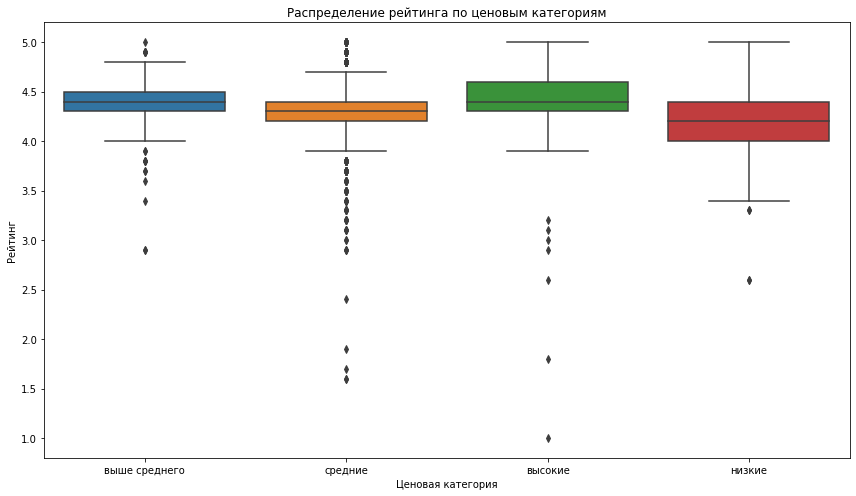

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=rest_df,
    x='price',
    y='rating',
)
plt.title('Распределение рейтинга по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')
plt.tight_layout()
plt.show()


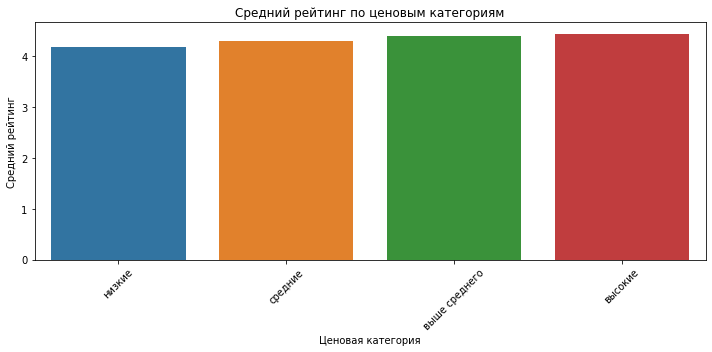

In [ ]:
price_rating = rest_df.groupby('price')['rating'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=price_rating.index, y=price_rating.values)
plt.title('Средний рейтинг по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: 

- Тенденция роста рейтинга с увеличением ценовой категории.

У заведений в категории «высокие» медианный рейтинг выше всего (≈ 4,4 – 4,5), у «выше среднего» чуть ниже (≈ 4,3 – 4,4), у «средних» около 4,25, у «низких» — самое низкое значение (≈ 4,1 – 4,2).

То есть более дорогие заведения в среднем получают чуть более высокие оценки посетителей.

- Ширина разброса и выбросы.

В дешёвых категориях («низкие», «средние») диапазон рейтингов шире, присутствует больше низких оценок (2–3 балла) и выбросов.

В дорогих («высокие») разброс уже: большинство заведений удерживаются в узком коридоре 4,0–5,0.

- Степень связи — слабая.

Связь 0,22 говорит о слабой положительной связи между ценовой категорией и рейтингом.

Это означает, что хотя средний чек влияет на оценку, этот фактор не является решающим: на рейтинг сильнее могут влиять сервис, атмосфера, меню и прочие атрибуты.

In [ ]:
# Подсчет топ-15 по name+category
chain_df = rest_df[rest_df['chain']==1]
top_chains = (chain_df.groupby(['name','category'])
              .agg(count=('id','count'), avg_rating=('rating','mean'))
              .sort_values('count', ascending=False)
              .head(15)
              .reset_index())
top_chains

,name,category,count,avg_rating
0,Шоколадница,кофейня,119,4.178151
1,Домино'с Пицца,пиццерия,76,4.169737
2,Додо Пицца,пиццерия,74,4.286486
3,One Price Coffee,кофейня,71,4.064789
4,Яндекс Лавка,ресторан,69,3.872464
5,Cofix,кофейня,65,4.075385
6,Prime,ресторан,49,4.114286
7,КОФЕПОРТ,кофейня,42,4.147619
8,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
9,Теремок,ресторан,36,4.105556


In [ ]:
# Комментарий ревьюера
tmp = rest_df.copy()          # создаем копию текущего датасета
name_tmp = 'му-му'       # задаем имя столбца для проверки уникальных категорий
print(f'Заведения с одинаковым именем {name_tmp} относятся к разным категориям:\n\
{", ".join(tmp[tmp.name_norm == name_tmp].category.unique())}')

Заведения с одинаковым именем му-му относятся к разным категориям:
кафе, ресторан, кофейня, быстрое питание, пиццерия, столовая, бар,паб


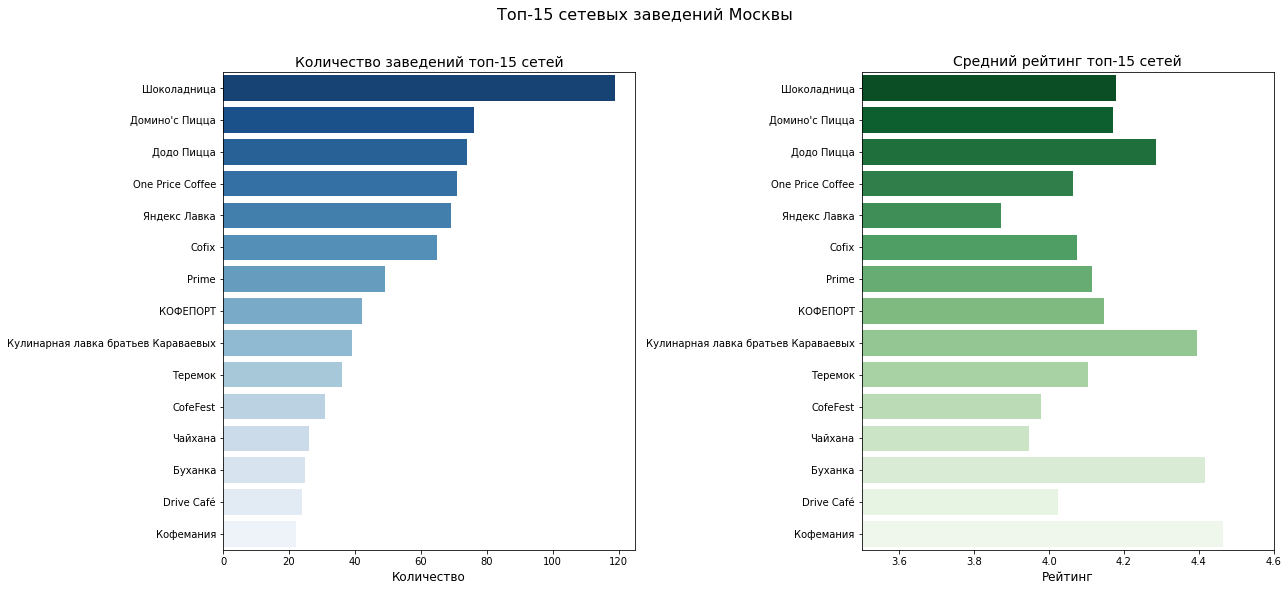

In [ ]:
# Создаем фигуру с двумя субплoтами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# График количества заведений
sns.barplot(
    data=top_chains,
    y='name',
    x='count',
    ax=ax1,
    palette='Blues_r'
)
ax1.set_title('Количество заведений топ-15 сетей', fontsize=14)
ax1.set_xlabel('Количество', fontsize=12)
ax1.set_ylabel('')

# График среднего рейтинга
sns.barplot(
    data=top_chains,
    y='name',
    x='avg_rating',
    ax=ax2,
    palette='Greens_r'
)
ax2.set_title('Средний рейтинг топ-15 сетей', fontsize=14)
ax2.set_xlabel('Рейтинг', fontsize=12)
ax2.set_ylabel('')
ax2.set_xlim(3.5, 4.6)  # Фиксируем шкалу для сравнения

# Общие настройки
plt.suptitle('Топ-15 сетевых заведений Москвы', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Вывод: Из полученных результатов видно, что больше всего сетевых заведений у Шоколадницы, но рейтинг выше всего у кофемании. Также можно заметить, что больше всего в этом топ-15 кофейн и пиццерий, что говорит о высокой популярности этих заведений.

In [ ]:
# Сводная статистика middle_avg_bill
rest_df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

In [ ]:
# Расчет средних и медиан по районам
dist_bill = (
    rest_df
    .groupby('district')['middle_avg_bill']
    .agg(mean='mean', median='median')
    .sort_values('mean', ascending=False)
    .reset_index()
)
dist_bill

,district,mean,median
0,Центральный административный округ,1191.057547,1000.0
1,Западный административный округ,1053.225490,1000.0
2,Северный административный округ,927.959627,650.0
3,Южный административный округ,834.398089,500.0
4,Северо-Западный административный округ,822.222930,700.0
5,Восточный административный округ,820.626923,575.0
6,Юго-Западный административный округ,792.561702,600.0
7,Северо-Восточный административный округ,716.611296,500.0
8,Юго-Восточный административный округ,654.097938,450.0


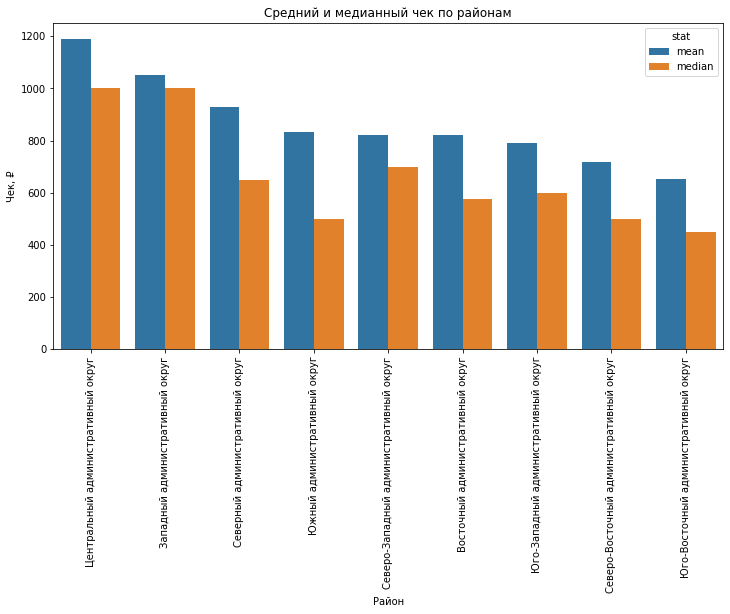

In [ ]:
# Визуализация: средние и медианы по районам
df_melt = dist_bill.melt(
    id_vars='district', value_vars=['mean','median'],
    var_name='stat', value_name='check'
)
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_melt, x='district', y='check', hue='stat'
)
plt.title('Средний и медианный чек по районам')
plt.xlabel('Район')
plt.ylabel('Чек, ₽')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Частота')

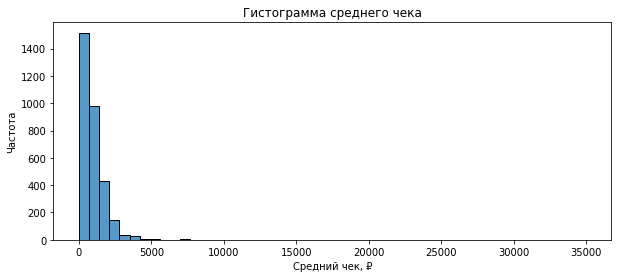

In [ ]:
# Гистограмма распределения среднего чека
plt.figure(figsize=(10,4))
sns.histplot(rest_df['middle_avg_bill'].dropna(), bins=50)
plt.title('Гистограмма среднего чека')
plt.xlabel('Средний чек, ₽')
plt.ylabel('Частота')

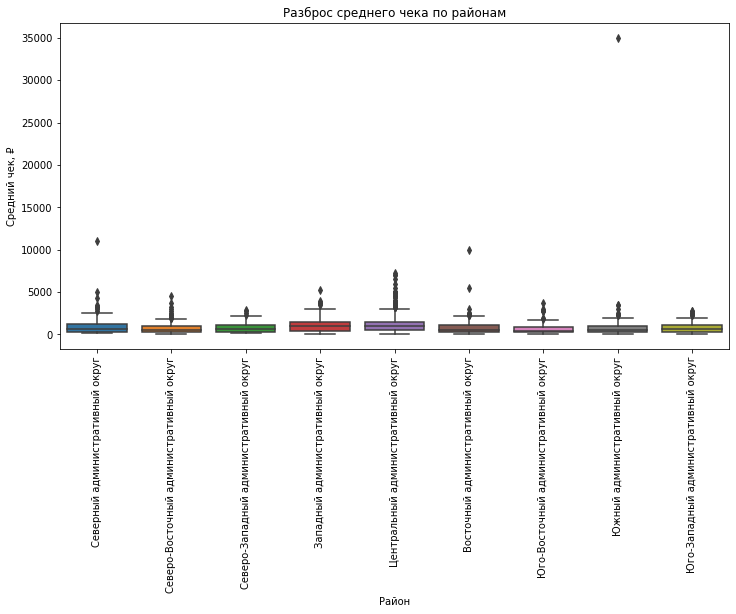

In [ ]:
# Ящик с усами для оценки выбросов
plt.figure(figsize=(12,6))
sns.boxplot(data=rest_df, x='district', y='middle_avg_bill')
plt.title('Разброс среднего чека по районам')
plt.xlabel('Район')
plt.ylabel('Средний чек, ₽')
plt.xticks(rotation=90)
plt.show()

Вывод: Наблюдается тенденция того, что самые большие цены в основном в ЦАО И ЗАО, в то время как в ЮВАО И СВАО самые маленькие цены, что может нам говорить о маленьком спросе в тех районах.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

- Категории заведений: доминируют кафе и рестораны(28.28% и 24.30%), а менее представлены столовые и булочные(3.75% и 3.05%)

- Районный анализ: больше всего заведений ЦАО 26,68%, а на окраинах меньше предложений(СЗАО - 4,87%)

- Сетевые заведения :доля сетевых заведений выше 50% среди булочных, пиццерий и кофейн; сетевые заведения показывают чуть более высокий средний рейтинг.

- Посадочные места: медиана ниже среднего из-за выбросов крупных залов; стоит вручную проверить экстремальные значения.

- Рейтинги: Средний рейтинг во всех заведениях примерно одинаковый, что говорит нам о популярности всех заведений, но при этом явно можно выделить бар.паб у которого рейтинг 4,39, а меньше всего у быстрого питания - 4,05

- Корреляция: сильнее всего связь между `rating` и `avg_bill` - 0,45, что может нам напрямую говорить о том, что от рейтинга заведения сильно зависит и его цена, что вполне является логичным - лучше условия и еда, значит лучше рейтинг, значит лучше средний чек.

- Топ-сети: Лидеры по количеству: «Шоколадница» (119 кофеен), «Домино’с Пицца» (76), «Додо Пицца» (74). Доминирование кофеен (6 из 15 позиций) и пиццерий (3 позиции). Рейтинги: Максимальный — «Кофемания» (4.46), минимальный — «Яндекс Лавка» (3.87).Сети с узкой специализацией («Буханка», «Кулинарная лавка») показывают высокие оценки.

- Средний чек: ЦАО — лидер по чекам, дальше САО и ЗАО; удалённость от центра коррелирует с понижением цен.

Вывод: полученные данные дают целостную картину ресторанного рынка Москвы, выявлены ключевые зависимости и зоны для дальнейшей детализации (проверка выбросов, более глубокий ценовой анализ, дополнительные факторы).

## 4. Итоговый вывод и рекомендации

### Общий обзор проделанной работы

- Объединены и предобработаны данные о заведениях и ценах: очищены дубликаты, заполнены и аргументированно обработаны пропуски, нормализованы текстовые форматы.

- Созданы дополнительные признаки: круглосуточность (is_24_7), статус сетевого заведения, числовая кодировка для категорий и районов.

- Проведён всесторонний исследовательский анализ: количественные оценки по категориям, районам, сетевому статусу, посадочным местам, рейтингу и среднему чеку.

###  Основные выводы исследования

- Разнообразие категорий: В Москве преобладают кафе и рестораны, при этом сегмент кофеен и пиццерий демонстрирует стабильный рост.

- Локационная концентрация: Центральный административный округ (ЦАО) — лидер по числу точек и среднему чеку, что указывает на высокую коммерческую привлекательность центра.

- Сетевые сети vs локальные: Сетевые заведения чаще встречаются в сегменте кофеен и имеют слегка более высокий средний рейтинг, однако абсолютное большинство составляют несетевые.

- Вместимость: Сильные выбросы по количеству мест связаны с отдельными крупными залами и могут искажать средние показатели; медиана лучше отражает типичный размер заведения.

- Рейтинг: В целом рейтинги схожи по категориям, с небольшим преимуществом у кофеен.

- Корреляции: Наиболее значимая зависимость — между средним чеком и рейтингом

- Популярные сети: Топ-15 сетей включают в основном рестораны и кофейни с устойчивым средним рейтингом, что говорит о проверенных местах.

- Ценовое позиционирование: Средний чек заметно выше в ЦАО, по мере удаления от центра наблюдается снижение цен, что важно для стратегии ценообразования и планирования новых точек.

### Рекомендации для заказчика

- Оптимизация ассортимента: Сосредоточить развитие новых форматов в сегментах, где присутствует рост (кофейни и пиццерии), учитывая предпочтения локального рынка.

- Выбор локаций: При экспансии отдавать приоритет районам с высокой покупательской способностью (ЦАО, САО), одновременно тестируя более доступные локации на периферии для диверсификации.

- Управление мощностью: При проектировании залов ориентироваться на медианные значения посадочных мест (~20–40), чтобы избежать простоя и избыточных затрат.

- Сетевое развитие: Рассмотреть стратегию франчайзинга в кофе сегменте, опираясь на положительный рейтинг сетевых точек.

- Ценообразование: Учитывать географический фактор при формировании меню и цен: более высокий чек в центре и более низкий на окраинах.
